# Covariance

https://www.investopedia.com/articles/financial-theory/11/calculating-covariance.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = 'AAPL'
symbol2 = 'QQQ'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

# View Columns
df1.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,111.709831,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,111.584778,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.152229,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.402542,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.441246,33561900


In [3]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,119.269997,119.989998,118.889999,119.540001,117.254288,22307600
2017-01-04,119.669998,120.410004,119.660004,120.190002,117.891861,19749100
2017-01-05,120.099998,120.949997,120.099998,120.870003,118.558853,20644300
2017-01-06,121.000000,122.250000,120.690002,121.930000,119.598587,24074300
2017-01-09,122.029999,122.550003,121.949997,122.330002,119.990944,18748000


In [4]:
c = df1['Adj Close'].cov(df2['Adj Close'])

In [5]:
c

457.62891396091828

In [6]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [7]:
df.head()

,Adj Close,Adj Close
Date,,
2017-01-03,111.709831,117.254288
2017-01-04,111.584778,117.891861
2017-01-05,112.152229,118.558853
2017-01-06,113.402542,119.598587
2017-01-09,114.441246,119.990944


In [8]:
# Rename columns
df.columns = [symbol1,symbol2]

In [9]:
df.head()

,AAPL,QQQ
Date,,
2017-01-03,111.709831,117.254288
2017-01-04,111.584778,117.891861
2017-01-05,112.152229,118.558853
2017-01-06,113.402542,119.598587
2017-01-09,114.441246,119.990944


In [10]:
n = 14
df['Cov'] = df['AAPL'].rolling(n).cov(df['QQQ'])

In [11]:
df.head(20)

,AAPL,QQQ,Cov
Date,,,
2017-01-03,111.709831,117.254288,NaN
2017-01-04,111.584778,117.891861,NaN
2017-01-05,112.152229,118.558853,NaN
2017-01-06,113.402542,119.598587,NaN
2017-01-09,114.441246,119.990944,NaN
2017-01-10,114.556656,120.255775,NaN
2017-01-11,115.172195,120.579460,NaN
2017-01-12,114.691307,120.393089,NaN
2017-01-13,114.489334,120.805077,NaN


Text(0.5,0,'Date')

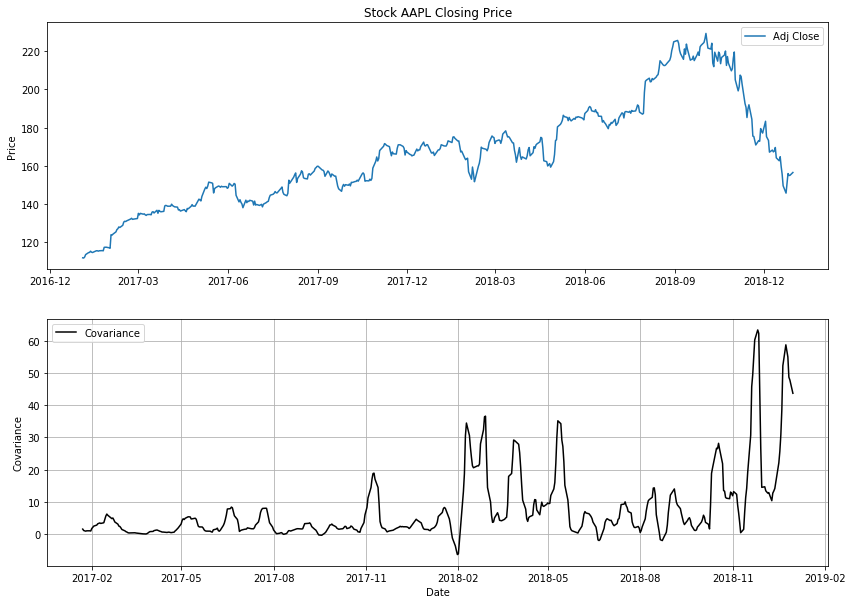

In [12]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Cov'], label='Covariance', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Covariance')
ax2.set_xlabel('Date')

## Candlestick with Covariance

In [13]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736332.0,115.800003,116.330002,114.760002,116.150002,111.709831,28781900,False
1,736333.0,115.849998,116.510002,115.750000,116.019997,111.584778,21118100,False
2,736334.0,115.919998,116.860001,115.809998,116.610001,112.152229,22193600,False
3,736335.0,116.779999,118.160004,116.470001,117.910004,113.402542,31751900,False
4,736338.0,117.949997,119.430000,117.940002,118.989998,114.441246,33561900,False


Text(0.5,0,'Date')

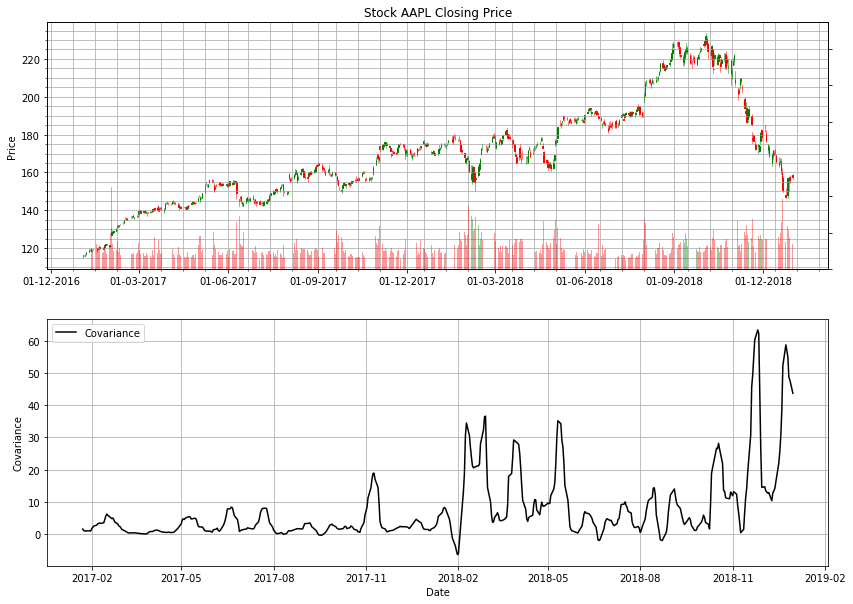

In [14]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Cov'], label='Covariance', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Covariance')
ax2.set_xlabel('Date')